# Netflix Movies and TV Shows

# About this Dataset: 
## Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globaly. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, rating, release year, duration, etc.

# Features Informations
### shows_id -----------> Unique ID for every Movie/ Tv Show
### type -------------------> Identifier - A movie or TV Show
### title --------------------> Title of the Movie / Tv Show
### director --------------> Director of the Movie
### cast -------------------> Actors involved in the Movie / Tv Show
### country --------------> Country where the Movie / Tv Show was produced
### date_added --------> Date it was added on Netflix
### release_year ------> Actual Release year of the Movie / Tv Show
### rating ----------------> TV Rating of the Movie / Tv Show
### duration ------------> Total Duration - in minutes or number of seasons
### listed_in ------------> The Genere of the movie and tv show
### description --------> The story which movie is about


# Interesting Task Ideas for This Dataset
## 1. Understanding what content is available in different countries
## 2. Does Netflix have more focus on TV Shows than movies in recent years?

In [2]:
# libraries for data cleaning and visualiziation
import pandas as pd
import numpy as np
import os
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Load Libraries for decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
movies = pd.read_csv("dataset/netflix_titles.csv")
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [21]:
movies.shape

(8790, 12)

In [22]:
# Statistical information about the dataset
movies.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
# Information about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8790 non-null object
type            8790 non-null object
title           8790 non-null object
director        8790 non-null object
cast            8790 non-null object
country         8790 non-null object
date_added      8790 non-null object
release_year    8790 non-null int64
rating          8790 non-null object
duration        8790 non-null object
listed_in       8790 non-null object
description     8790 non-null object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# Picturing my analysis & what to clean
### 1. the dataset is good. There is not much to clean.
### 2. However, in the cleaning we will look only for duplicates or nulls.

In [24]:
# Because there are not any duplicate data, so we don't need to clean them
movies.duplicated().sum()

0

In [25]:
# Shape of data before cleaning
movies.shape

(8790, 12)

# Handling missing values
## We will not drop columns or rows with null values, because some feature have too many null values, and they are valueable. If we delete them, the accuracy of the data will go down.

In [26]:
# Filling null values with specific strings
movies.director.fillna('No Director', inplace=True)
movies.cast.fillna('No Cast', inplace=True)
movies.country.fillna('Country Unavailable', inplace=True)
movies.dropna(subset=['date_added','rating','duration'],inplace=True)


In [27]:
# Shape after handling missing values
movies.shape

(8790, 12)

In [28]:
# Null values
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Compare Netflix Content through Type

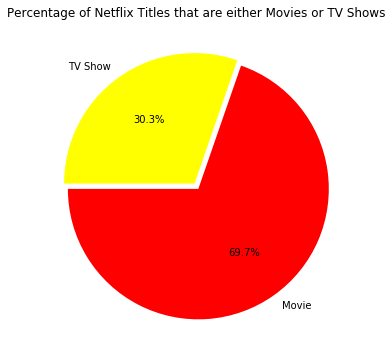

In [29]:
# Showing the precentage of 'TV Shows' and 'Movies' in graph
plt.figure(figsize=(12,6))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(movies.type.value_counts(), 
            explode=(0.025,0.025),labels=movies.type.value_counts().index,
            colors=['red','yellow'],autopct='%1.1f%%',startangle=180)
plt.show()

# Total Content added across all years up to now

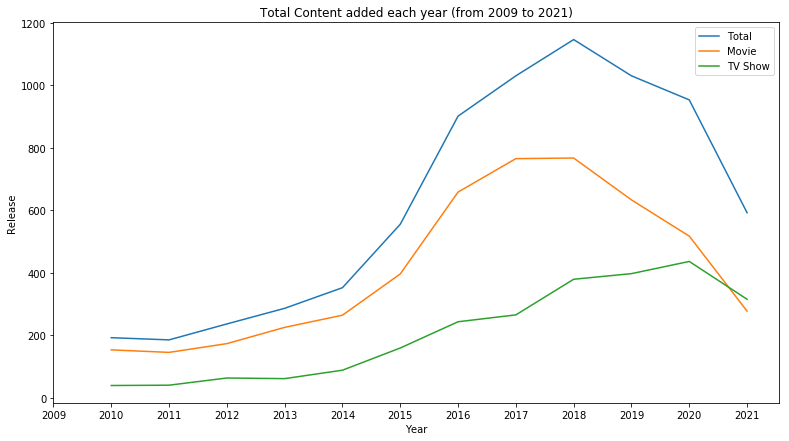

In [30]:
netflix_year = movies['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year',
                                                                                              'release_year':'count'})
netflix_year = netflix_year[netflix_year.year > 2009]

# netflix_year2 = movies[['type','release_year']]

movie_year = movies[movies['type']=='Movie'].release_year.value_counts().reset_index().rename(columns={'index':'year',
                                                                                                       'release_year':'count'})
movie_year = movie_year[movie_year.year > 2009]

show_year = movies[movies['type']=='TV Show'].release_year.value_counts().reset_index().rename(columns={'index':'year',
                                                                                                        'release_year':'count'})
show_year = show_year[show_year.year > 2009]

# Release content each year
fig, ax = plt.subplots(figsize=(13,7))

sns.lineplot(data=netflix_year, x='year',y='count')
sns.lineplot(data=movie_year, x='year',y='count')
sns.lineplot(data=show_year, x='year',y='count')
ax.set_xticks(np.arange(2009,2022,1))

plt.title('Total Content added each year (from 2009 to 2021)')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Release')
plt.xlabel('Year')
plt.show()

# Countries by Amount of Produced Content

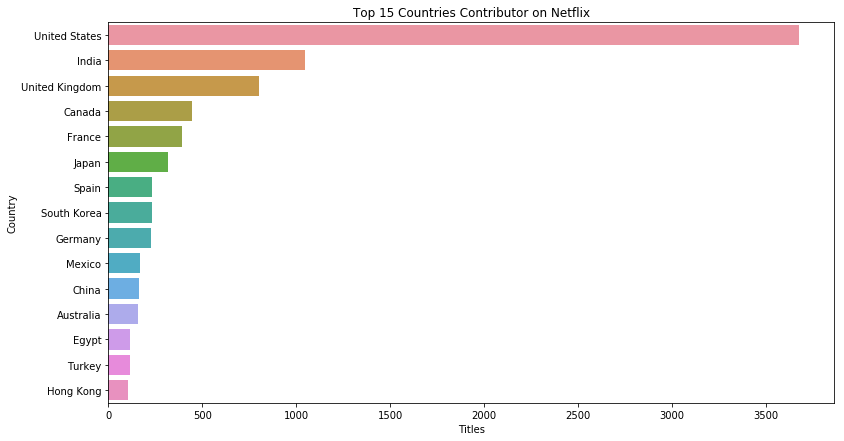

In [31]:
filtered_countries = movies.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y=filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

# Top Directors on Netflix

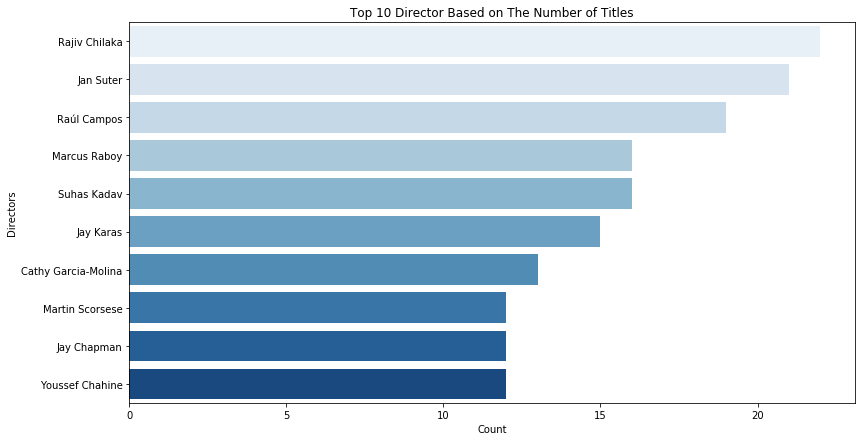

In [33]:
filtered_directors = movies.set_index('title').director.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
filtered_directors = filtered_directors[filtered_directors != 'No Director']
plt.figure(figsize=(13,7))
g = sns.countplot(y=filtered_directors, order=filtered_directors.value_counts().index[:10],palette='Blues')
plt.title('Top 10 Director Based on The Number of Titles')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()


# Top Geners on Netflix

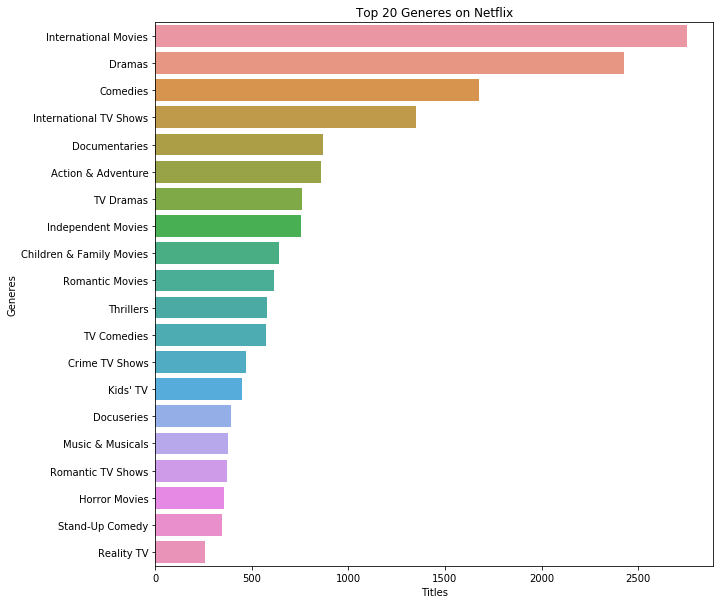

In [34]:
filtered_generes = movies.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
# filtered_generes = filtered_generes[filtered_generes != 'No Director']
plt.figure(figsize=(10,10))
g = sns.countplot(y=filtered_generes, order=filtered_generes.value_counts().index[:20])
plt.title('Top 20 Generes on Netflix')
plt.xlabel('Titles')
plt.ylabel('Generes')
plt.show()

# Content By Rating

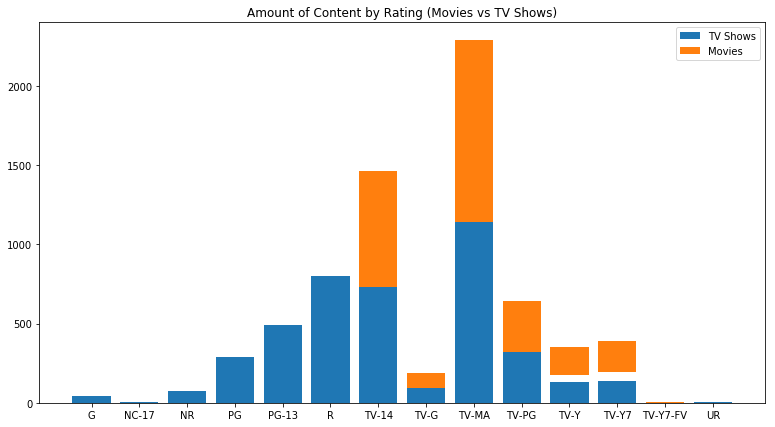

In [35]:
netflix_movies = movies[movies['type'] == 'Movie']
netflix_shows = movies[movies['type'] == 'TV Show']

movies.rating.unique()

count_movies = netflix_movies.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating":"NC-17","title":0},{"rating":"PG-13","title":0},{"rating":"UR","title":0}],
                                 ignore_index=True)
count_shows.sort_values(by="rating",ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_shows.rating, count_shows.title, bottom=count_shows.title)
plt.legend(['TV Shows','Movies'])
plt.show()

# Top Actors on Netflix Depending on Total Titles

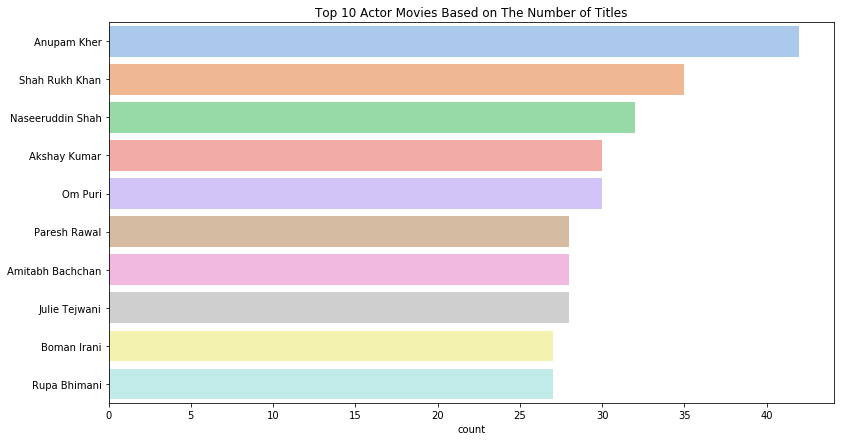

In [37]:
netflix_movies = movies[movies['type'] == 'Movie']

filtered_cas_movies = netflix_movies[netflix_movies != 'No Cast'].set_index('title').cast.str.split(', '
                                                            ,expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y=filtered_cas_movies, order=filtered_cas_movies.value_counts().index[:10],palette='pastel')
plt.show()

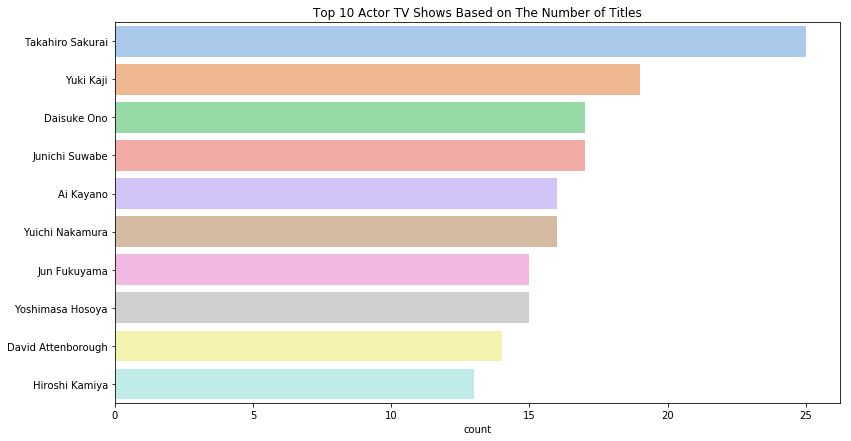

In [38]:
netflix_shows = movies[movies['type'] == 'TV Show']

filtered_cast_shows = netflix_shows[netflix_shows != 'No Cast'].set_index('title').cast.str.split(', '
                                                    ,expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y=filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10],palette='pastel')
plt.show()

# Conclusion

## . A country by the amount of content produces is the United States.
## . A general streaming platform in progress getting traction after the year 2014. Since that time, the added content has been growing significantly, but after 2019 it started reducing.
## . International Movies is the genere, which is mainly on Netflix.
## . The biggest count of the Netflix content is done with the "TV-MA" ratings.
## . The maximum content type on Netflix is Movies.
## . The most well-known actor on the Netflix TV Shows depending on total titles is Takahiro Sakurai.
## . The most well-known actor on the Netflix Movie depending on total titles is Anupam Kher.
## . The most widespread director on Netflix having maximum titles is Rajiv Chilaka


# Machine Learning Algoritms
### As machin learning algoritms we want to predict that a new movie belongs to which type (tv show or movie) with decision tree classifier

In [169]:
# drop the show id columns from data set
new_data = movies.drop(columns=['show_id'])
new_data.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [192]:
# input and output data
input_data = new_data.drop(columns=['type'])
output_data = new_data['type'] # class
# ----------------------------------
# decision tree doesn't accept nominal data, for that we should change nominal to numerical data
# converting to float 
for col_name in input_data.columns:
    if(input_data[col_name].dtype == 'object'):
        input_data[col_name] = input_data[col_name].astype('category')
        input_data[col_name] = input_data[col_name].cat.codes
# ----------------------------------

model = DecisionTreeClassifier()
model.fit(input_data,output_data)

# ----------------------------
# new data
columns = ["title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]
new_input_data = pd.DataFrame([['Sankofa','Haile Gerima','Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...','United States, Ghana, Burkina Faso, United Kin...','September 24, 2021','1993','TV-MA','125 min','Dramas, Independent Movies, International Movies','As her father nears the end of his life, filmm...']],columns=columns)
for col in new_input_data.columns:
    if(new_input_data[col].dtype == 'object'):
        new_input_data[col] = new_input_data[col].astype('category')
        new_input_data[col] = new_input_data[col].cat.codes
        
# -----------------------------
predictions = model.predict(new_input_data)
predictions



array(['TV Show'], dtype=object)

In [193]:
# counting the accuracy
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(pd.get_dummies(input_data), output_data, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(input_train_data, output_train_data)

predictions = model.predict(input_test_data)
score = accuracy_score(output_test_data, predictions)
round(score*100)

99.0